Deustch's Algorithm implementation

In [1]:
from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister
from qiskit.providers.basic_provider import BasicProvider
from qiskit import transpile
#from qiskit_ibm_runtime import QiskitRuntimeService

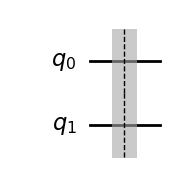

In [2]:
def f0(qc):
    qc.barrier()
    return qc

f0(QuantumCircuit(2)).draw(output='mpl')

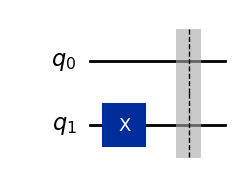

In [3]:
def f1(qc):
    qc.x(1)
    qc.barrier()
    return qc

f1(QuantumCircuit(2)).draw(output='mpl')

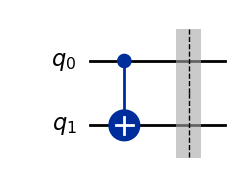

In [4]:
def fx(qc):
    qc.cx(0,1)
    qc.barrier()
    return qc

fx(QuantumCircuit(2)).draw(output='mpl')

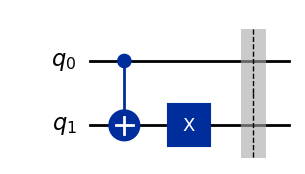

In [5]:
def fxx(qc):
    qc.cx(0,1)
    qc.x(1)
    qc.barrier()
    return qc

fxx(QuantumCircuit(2)).draw(output='mpl')

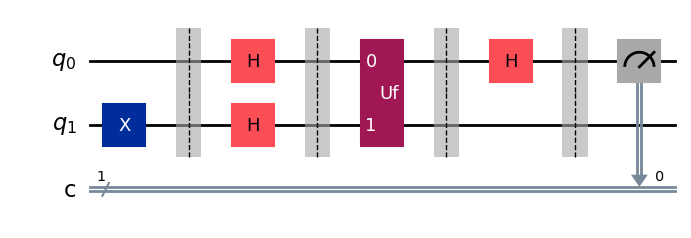

In [6]:
def deustch(oracle):
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.barrier()
    inst = oracle(QuantumCircuit(2, name='Uf')).to_instruction()
    qc.append(inst, [0,1])
    qc.barrier()
    qc.h(0)
    qc.barrier()
    qc.measure(0,0)
    return qc

deustch(f0).draw(output='mpl')

In [9]:
backend = BasicProvider().get_backend("basic_simulator")
circuit = deustch(f1)
new_circuit = transpile(circuit, backend = backend)
job = backend.run(new_circuit, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 1024}


NameError: name 'plt_histogram' is not defined